# Linear Regression using Least Square and Least Mean Square Methods



<font color="blue"> Karthick Selvaraj </font>

# Data

Introduction for Regression Data Set Bike Sharing System:
------------------------------------------------------------

 Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic.
    
    Bike sharing data set is hourly record of number of bikes rented by both registered and casual users from 2011 to 2012.
    
Number of Instances:
17389
Number of Attributes:
16

Column Names:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. 
- atemp: Normalized feeling temperature in Celsius. 
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('hour.csv')

Text(0.5,1,'Seasons Vs Total Users')

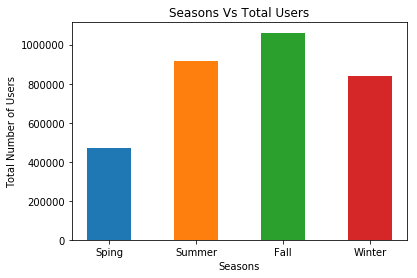

In [2]:
#Plot 1: 
#Seasons Vs Total Users

import matplotlib.pyplot as plt
%matplotlib inline

grouped = df.groupby(['season'])
LABELS = ["Sping", "Summer", "Fall","Winter"]

data=grouped['cnt'].aggregate(np.sum)

for num, vals in enumerate(data):
    plt.bar(num, vals, 0.5)
    
arr=df.groupby('season').apply(list)

plt.xticks( range(len(arr)),LABELS )
plt.ylabel('Total Number of Users')
plt.xlabel('Seasons')
plt.title('Seasons Vs Total Users')

Text(0.5,1,'Time of Day Vs Total Users')

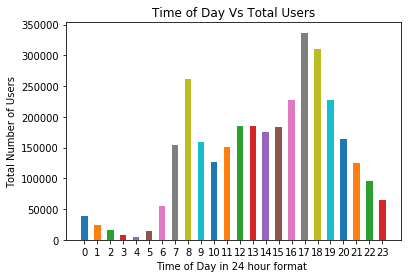

In [3]:
#plot 2
#'Time of Day Vs Total Users'

import matplotlib.pyplot as plt
%matplotlib inline

grouped = df.groupby(['hr'])

data=grouped['cnt'].aggregate(np.sum)

for num, vals in enumerate(data):
    plt.bar(num, vals, 0.5)
    
arr=df.groupby('hr').apply(list)

plt.xticks( range(len(arr)),range(24) )
plt.ylabel('Total Number of Users')
plt.xlabel('Time of Day in 24 hour format ')
plt.title('Time of Day Vs Total Users')

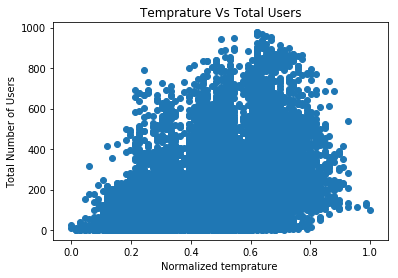

In [4]:
#plot 3
#'Temprature Vs Total Users'

import matplotlib.pyplot as plt
%matplotlib inline

plt.ylabel('Total Number of Users')
plt.xlabel('Normalized temprature ')
plt.title('Temprature Vs Total Users')
plt.scatter(df['atemp'], df['cnt'])
plt.show()





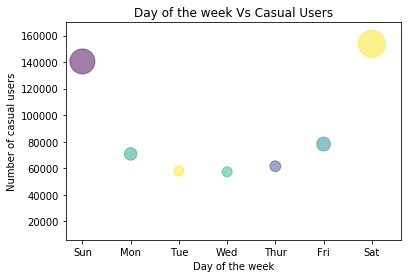

In [5]:
#plot 4:
#'Day of the week Vs Casual Users

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

grouped1 = df.groupby(['weekday'])

data1=grouped1['casual'].aggregate(np.sum).reset_index()
area=(np.pi*data1['casual']**2)*0.00000001
colors = np.random.rand(len(data1['weekday']))
WEEK=['Sun','Mon','Tue','Wed','Thur','Fri','Sat']



plt.scatter(data1['weekday'], data1['casual'], s=area, c=colors, alpha=0.5,clip_on=False)
plt.ylabel('Number of casual users')
plt.xlabel('Day of the week')
plt.title('Day of the week Vs Casual Users')
plt.xticks( range(len(data1['weekday'])),WEEK )
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,6.6,6000,170000))
plt.show()



# Preliminary observation:
-------------------------
#Plot 1: 
#Seasons Vs Total Users
From Plot 1 - We can see that their is a huge Surge of users in Fall Season and also good number of users in summer , but the usage of bike rentals goes down during winter and spring.

#plot 2
#'Time of Day Vs Total Users'
From this plot we can see the usage of rental bikes peaks during 8 am in the moring and also between 5pm-6pm in the evening.
And there is a steady decrease in usage after 8pm until 6am next moring where usage starts increasing again.


#plot 3
#'Temprature Vs Total Users'
From this plot we can see that usage of rental bikes is low during colder tempratures especially below 0.3(normalized temp) and when the temprature is very high above 0.7(normalized temp). Usage peaks when  temprature is between 0.4 < temp < 0.7.


#plot 4:
#'Day of the week Vs Casual Users

From this Plot we can see that number of causal(Non registered) rental bike users peak during weekends compared to weekdays.
Also mondays and fridays seems to have higher rate of casual users than other days of weekdays.


# Preprocessing:
--------------
1. Weekday , working day ,Season , holiday and Weather Situation was converted to indicator columns from categorical columns
2. Temprature , Humidity  and winspeed were already normalised in the data
3. Massaged the date column to remove hypen for use in numpy
4. Checked for nulls in columns

In [6]:
df['dteday']=df['dteday'].replace('-', '', regex=True)
df.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

# Method

 - review of the linear models 
 ------------------------------------
**Least Square:** Gives us the value of the weights (w0,w1..wn) for n features of X such that error rate between the predicted and actual outcomes are minimized . In other words, we want to minimize the sum of Euclidean distances between the target values and the model outputs.Least squares use all the available data for training or finding the best fit.

 **Least Mean Square:** The above method of least square can be costly when data is too large and computationally intensive. In least mean square we use online update method of weights , where introduce the data points one by one and update the weight each time a new data point is introduced. We have learning rate alpha which will decide the degree of adjustment in weights .This method is also called stochastic gradient method as it minimize the error function gradually with each data point.
 
 implementation and description
 ----------------------------------------
 
Class LinearModel is inherited by classes LinearRegress() and LMS() ,The class LinearModel initializes the value of w as none in its constructor. The class linear model also implements the add_ones method for adding bias columns and check_matrix method to check validity of dimensions.

The subclass LinearRegress implements the abstract methods of train and use. The train method calculates the minimized error weight vector. The use method takes the test data and generates the predicted output Y.

The subclass LMS initializes the value of alpha in its constructor. In the train method the LMS implements the online update weight algorithm. The use method takes the test data and generates the predicted output Y. In addition to the above methods, the LMS also implements a train_step method , which trains the model for only single step.

The train and test data was partitioned in the ratio 80:20 by the partition method.

 
 
 
 


### Super Classs Definition

In [7]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class  

class BaseModel(ABC):
    """ Super class """
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            print(mat.shape)
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """    
        
        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [8]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X1=self.add_ones(X)
        w = np.linalg.lstsq(X1.T @ X1, X1.T @ T)[0]
        self.w=w
        return w
       # pass  ## TODO: replace this with your codes
    
    # apply the learned model to data X
    def use(self, Xuse):
        Xu=self.add_ones(Xuse)
        Y=Xu@self.w
        return Y
        
        #pass  ## TODO: replace this with your codes

### Least Mean Squares

In [9]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
        
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        o=np.array([1])
        x3=np.append(o,x,axis=0)
        x2=x3.flatten()
        x2=x2.reshape(x2.shape[0],1)
        self.w = np.zeros((x2.shape))
        self.w=self.w.reshape((x2.shape[0],1))
        self.w -= self.alpha * (self.w.T @ x2 - t) * x2


        

        #pass  ## TODO: replace this with your codes
        
         # batch training by using train_step function
    def train(self, X, T):
        X1=self.add_ones(X)
        self.w = np.zeros((X1.shape[1], T.shape[1]))
        Xval=X1
        Tval=T
        N=Xval.shape[0]
        for i in range(N):       
            gradient = Xval[i].T*(Xval[i].dot(self.w) - T[i])
            gradient=gradient.reshape((self.w.shape[0],1))
            self.w = self.w - self.alpha * gradient
        return self.w
        #pass  ## TODO: replace this with your codes
    
    # apply the current model to data X
    def use(self, Xtest):
        Xu=self.add_ones(Xtest)
        Y = Xu @ self.w
        return Y
        
        #pass  ## TODO: replace this with your codes
        

### Usage Examples

In [10]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import pandas as pd
import numpy as np


df = pd.read_csv('hour.csv')
ed=df.iloc[:,3:14]

#df.iloc[:,2]
ed.insert(0,column='season', value=df.iloc[:,2])
di = { 1: "spring",2: "summer",3: "fall", 4: "winter"}
mon = { 1: "jan",2: "feb",3: "mar", 4: "apr", 5: "may",6: "jun",
      7: "jul", 8: "aug", 9: "sept",10: "oct",11: "nov", 12: "dec"}
WEEK={1:'Sun',2:'Mon',3:'Tue',4:'Wed',5:'Thur',6:'Fri',7:'Sat'}
wsit= { 1: "clear",2: "mist",3: "light snow", 4: "rain"}
yrs= { 0: "2011",1: "2012"}
    
ed.replace({"season": di},inplace=True)
ed.replace({"mnth": mon},inplace=True)
ed.replace({"weekday": WEEK},inplace=True)
ed.replace({"weathersit": wsit},inplace=True)
ed.replace({"yr": yrs},inplace=True)
pd.get_dummies(ed.loc[:, 'season'])
pd.get_dummies(ed.loc[:, 'mnth'])
pd.get_dummies(ed.loc[:, 'hr'])

pd.get_dummies(ed.loc[:, 'weathersit'])

X = pd.concat([
        pd.get_dummies(ed.loc[:, 'season']), 
        pd.get_dummies(df.loc[:, 'yr']), 
        pd.get_dummies(df.loc[:, 'mnth']),
        pd.get_dummies(df.loc[:, 'hr']),
        ed['holiday'],
        pd.get_dummies(ed.loc[:, 'weekday']),
        ed['workingday'],
        pd.get_dummies(ed.loc[:, 'weathersit']),
        df.iloc[:,10:14]],
        axis=1)

T=df['cnt']

def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

Xlst, Tlst = partition(pd.DataFrame(X), pd.DataFrame(T))









In [12]:
ls=LinearRegress()

Xtrainin=Xlst[0]
Xtestin=Xlst[1]


Ttrainin=np.log(Tlst[0].values+1)
Ttestin=np.log(Tlst[1].values+1)

weight=ls.train(Xtrainin,Ttrainin)

ls._check_matrix(weight,"wmat")
Y1=ls.use(Xtrainin)
Y=ls.use(Xtestin)





Text(0.5,1,'LEAST SQAURE- Target value plot')

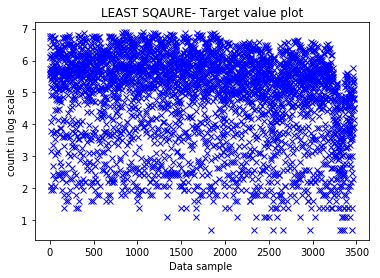

In [13]:
plt.plot(Ttestin, 'xb')
plt.ylabel('count in log scale')
plt.xlabel('Data sample ')
plt.title('LEAST SQAURE- Target value plot')

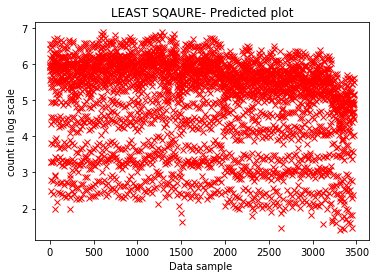

In [14]:
plt.ylabel('count in log scale')
plt.xlabel('Data sample ')
plt.title('LEAST SQAURE- Predicted plot')
plt.plot(Y, 'xr')

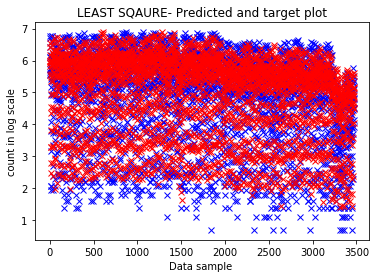

In [15]:
#RESULT PLOT #1 for LS

plt.ylabel('count in log scale')
plt.xlabel('Data sample ')
plt.title('LEAST SQAURE- Predicted and target plot')
plt.plot(Ttestin, 'xb')
plt.plot(Y, 'xr')


In [16]:
print("Root Mean of error ",np.sqrt(np.mean((Ttestin- Y)**2)))

print("Root Sum of error",np.sqrt(np.sum((Ttestin- Y)**2)))


Root Mean of error  0.597587138696
Root Sum of error 35.2323105949


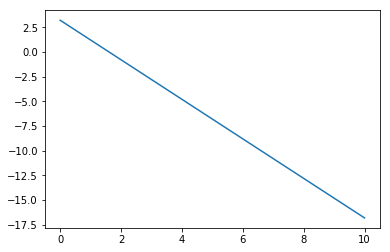

In [17]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

In [18]:
lms=LMS(0.01)


Xtrainin=Xlst[0]
Xtestin=Xlst[1]


Ttrainin=np.log(Tlst[0].values+1)
Ttestin=np.log(Tlst[1].values+1)

weight=lms.train(Xtrainin,Ttrainin)


lms._check_matrix(weight,"wmat")
Y=lms.use(Xtestin)





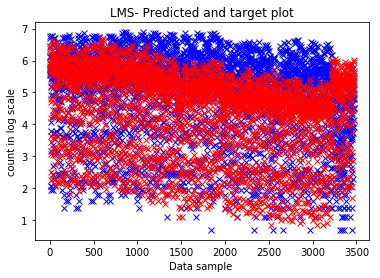

In [19]:
#RESULT PLOT #2 for LMS
plt.ylabel('count in log scale')
plt.xlabel('Data sample ')
plt.title('LMS- Predicted and target plot')
plt.plot(Ttestin, 'xb')
plt.plot(Y, 'xr')

In [20]:
print("Root Mean of error ",np.sqrt(np.mean((Ttestin- Y)**2)))

print("Root Sum of error",np.sqrt(np.sum((Ttestin- Y)**2)))

Root Mean of error  0.84735041668
Root Sum of error 49.9577570031


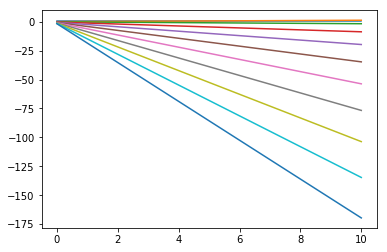

In [21]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

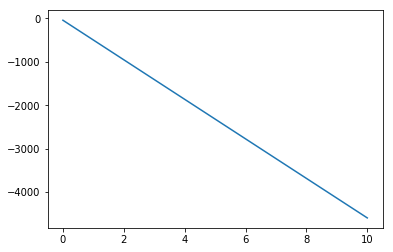

In [22]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments


description, codes
---------------------
The objective of the experiment is to predict the total bike usage count on an hourly basis based on the extracted features of the data.
For best results, the temperature , humidity , wind speed columns were normalized and categorical columns like month , year , season , weather situation , hour were converted into indicator columns.
The data of bike sharing system data was partitioned as 80% of the data was used for training and 20 % of data was used for testing the models. 


visualization of results
----------------------------------

Refer above **Result plot** #1 and #2 for LS and LMS

Result plot#1: plots the data points and count for target(T) and predicted(Y) for Least Square alogrithm

Result plot#2: plots the data points and count for target(T) and predicted(Y) for Least Mean Square alogrithm



analysis / comparison of algorithms
--------------------------------------------

1.The least sqaure algorithm was able to achieve RMSE =0.597587138696 


2.The lease mean square algorithm was able to ahceive a RMSE =0.84735041668

This data set if bike sharing system seems to perfrom really good with linear models.

For this bike sharing data set , The lease square algorthim was able to perfrom better than the LMS algorithm.



# References

1.Regression data: Bike sharing data Set
-------------------------------------------
Fanaee-T, Hadi, and Gama, Joao, 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, [Web Link]. 


# Least and most significant features in the data

In [23]:

#Calculation for extra credit work

Ximprove = pd.concat([
        pd.get_dummies(ed.loc[:, 'season']), 
        pd.get_dummies(df.loc[:, 'yr']), 
        pd.get_dummies(df.loc[:, 'mnth']),
        #pd.get_dummies(df.loc[:, 'hr']),#most significant - COMMNETED OUT FOR CALCULATION PURPOSES
        ed['holiday'],#least significant
        pd.get_dummies(ed.loc[:, 'weekday']),
        ed['workingday'],#least significant
        pd.get_dummies(ed.loc[:, 'weathersit']),
        df.iloc[:,10:14]],
        axis=1)

Timprove=df['cnt']


Xlstimp, Tlstimp = partition(pd.DataFrame(Ximprove), pd.DataFrame(Timprove))

lsimp=LinearRegress()

Xtraininimp=Xlstimp[0]
Xtestinimp=Xlstimp[1]


Ttraininimp=np.log(Tlstimp[0].values+1)
Ttestinimp=np.log(Tlstimp[1].values+1)

weight=ls.train(Xtraininimp,Ttraininimp)

Y=ls.use(Xtestinimp)

print("To measure significance of various data features for extra credit, please comment out to remove data from inclusion")
print("Mean of error ",np.sqrt(np.mean((Ttestin- Y)**2)))

print("Sum of error",np.sqrt(np.sum((Ttestin- Y)**2)))

To measure significance of various data features for extra credit, please comment out to remove data from inclusion
Mean of error  1.16679463016
Sum of error 68.7914249624


# Preliminary Test for the model (just to make sure we got the implementation correct)

In [24]:
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])

T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.
